# Multiclass Classification with sklearn


In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
print("[X] downloading data...")
mnist = datasets.fetch_mldata("MNIST Original")

[X] downloading data...


In [10]:
from sklearn.cross_validation import train_test_split

#Temporarily reduce the training set to speed up execution while testing...
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.95)
print('X_train size :', X_train.shape)


X_train size : (3500, 784)


In [4]:
from sklearn.linear_model import LogisticRegression

Lambda = 1

#lr = LogisticRegression(solver='lbfgs', C=1/Lambda)  # C = 1/lambda (default = 1, if lower, regularization is stronger)

test_scores_for_all = np.array([])
train_scores_for_all = np.array([])

lr_all = [0,0,0,0,0,0,0,0,0,0]

# One vs all algorithm
for value in range(10):
    y = np.copy(y_train)
    y[y_train==value] = 1
    y[y_train!=value] = 0

    lr_all[value] = LogisticRegression(solver='lbfgs', C=1/Lambda)  # C = 1/lambda (default = 1, if lower, regularization is stronger)
    lr_all[value].fit(X_train,y)
    lr_all[value].get_params()

    #print('Coeff = {}, intercept = {}'.format(lr.coef_[0], lr.intercept_ ))
    print('intercept = {}'.format(lr_all[value].intercept_ ))
    #lr_all = np.append(lr_all, np.copy(lr))
    print('intercept = {}'.format(lr_all[value].intercept_ ))
    print('*** LR ALL ***')
    for i in range(value+1):
        print('lr_all[{}] = {}'.format(i, lr_all[i].intercept_))
    
    train_score = lr_all[value].score(X_train, y)
    train_scores_for_all = np.append(train_scores_for_all, train_score)
    print('Score on training set : ', lr_all[value].score(X_train,y))
    
    y_test_one = np.copy(y_test)
    y_test_one[y_test==value] = 1
    y_test_one[y_test!=value] = 0
 
    test_score = lr_all[value].score(X_test,y_test_one)
    test_scores_for_all = np.append(test_scores_for_all, test_score)
    
    print('Score on test set : ', test_score)

for value in range(10):
    print('lr all[x]', lr_all[value].intercept_)
    print('Test score for {} : {}'.format(value, test_scores_for_all[value]))

print('Mean performace on training set : ', np.mean(train_scores_for_all))
print('Mean performance on test set : ', np.mean(test_scores_for_all))

#Note: for 15% datatest, score for training set is 98% and test set : 97.5%
    

intercept = [-0.00025326]
intercept = [-0.00025326]
*** LR ALL ***
lr_all[0] = [-0.00025326]
Score on training set :  1.0
Score on test set :  0.981500721501
intercept = [ -2.27195759e-05]
intercept = [ -2.27195759e-05]
*** LR ALL ***
lr_all[0] = [-0.00025326]
lr_all[1] = [ -2.27195759e-05]
Score on training set :  1.0
Score on test set :  0.986161616162
intercept = [-0.00054286]
intercept = [-0.00054286]
*** LR ALL ***
lr_all[0] = [-0.00025326]
lr_all[1] = [ -2.27195759e-05]
lr_all[2] = [-0.00054286]
Score on training set :  1.0
Score on test set :  0.963780663781
intercept = [-0.0008183]
intercept = [-0.0008183]
*** LR ALL ***
lr_all[0] = [-0.00025326]
lr_all[1] = [ -2.27195759e-05]
lr_all[2] = [-0.00054286]
lr_all[3] = [-0.0008183]
Score on training set :  1.0
Score on test set :  0.943795093795
intercept = [-0.00018339]
intercept = [-0.00018339]
*** LR ALL ***
lr_all[0] = [-0.00025326]
lr_all[1] = [ -2.27195759e-05]
lr_all[2] = [-0.00054286]
lr_all[3] = [-0.0008183]
lr_all[4] = [-0

## Predict values


total :  [2168 7832]
perf = 78.32000000000001%


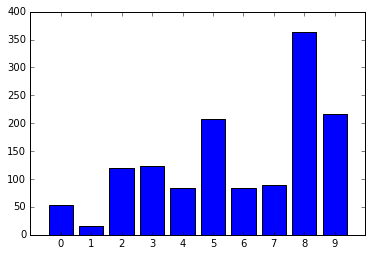

8 has been missed 363 times
9 has been missed 217 times
5 has been missed 208 times
3 has been missed 123 times
2 has been missed 119 times
7 has been missed 89 times
6 has been missed 84 times
4 has been missed 83 times
0 has been missed 53 times
1 has been missed 16 times
Confusion :


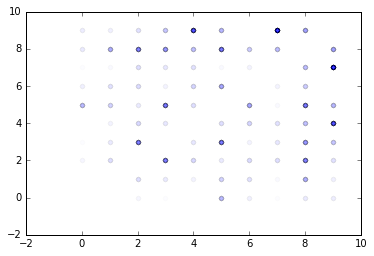

In [5]:
def getRandomDigitFrom(n):
    r = np.random.randint(0,1000)
    img = mnist.data[3000+n*6000+r].reshape(28,28)    
    return img

guesses = np.array([])
confusion = np.empty((0,2))
not_found = np.array([])

for ntest in range(10000):
    digit_to_guess = np.random.randint(0,10)
    img = getRandomDigitFrom(digit_to_guess)
    #plt.axis('off')
    #plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.show()
    img = img.reshape(1,-1)
    guessed = 0
    wrong_digit = -1
    #print('This is a ', digit_to_guess)
    for i in range(len(lr_all)):
        test = lr_all[i].predict(img) 

        if test:
            #print('I guess this is a ', i)
            if ( digit_to_guess == i):
                #print('GUESSED !!!')
                guessed = 1
            else:
                wrong_digit = i
    
    guesses = np.append(guesses, guessed)
    if(guessed == 0):
        if wrong_digit >= 0:
            conf = np.sort(np.array([digit_to_guess, wrong_digit]))
            confusion = np.vstack((confusion, conf))
        else:
            not_found = np.append(not_found,digit_to_guess)
        
       
    
w,d = np.unique(guesses, return_inverse=True)
#print('confusion: ', confusion)
#print('d', d)
print('total : ', np.bincount(d))
print('perf = {}%'.format(np.bincount(d)[1] / (np.bincount(d)[0] + np.bincount(d)[1]) *100))

# Stats on most not found digits:
not_found_qty = np.bincount(list(not_found))
fig, ax = plt.subplots()
plt.bar(range(10), not_found_qty, align='center')
plt.xlim(-1,10)
ax.set_xticks(range(10))
plt.show()

not_found_idx = np.ma.argsort(not_found_qty)[::-1]
for i in range(not_found_idx.size):
    print('{} has been missed {} times'.format(not_found_idx[i], not_found_qty[not_found_idx[i]]))


#Stats on confusion:
print('Confusion :')
plt.scatter(confusion[:,0], confusion[:,1], alpha=0.01)
plt.scatter(confusion[:,1], confusion[:,0], alpha=0.01)
plt.show()





## Better than using logistic regression, use SVM / SVC

In [11]:
from sklearn import svm
classifier = svm.SVC(C=100, gamma=0.001, kernel='linear' )

In [12]:
classifier.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

This is a  5
guessed :  [ 5.]
This is a  1
guessed :  [ 1.]
This is a  6
guessed :  [ 6.]
This is a  0
guessed :  [ 0.]
This is a  6
guessed :  [ 6.]
This is a  4
guessed :  [ 4.]
This is a  5
guessed :  [ 5.]
This is a  9
guessed :  [ 9.]
This is a  5
guessed :  [ 5.]
This is a  8
guessed :  [ 8.]
This is a  0
guessed :  [ 0.]
This is a  1
guessed :  [ 1.]
This is a  0
guessed :  [ 0.]
This is a  1
guessed :  [ 1.]
This is a  7
guessed :  [ 7.]
This is a  2
guessed :  [ 2.]
This is a  2
guessed :  [ 8.]
This is a  0
guessed :  [ 0.]
This is a  6
guessed :  [ 6.]
This is a  6
guessed :  [ 6.]
This is a  5
guessed :  [ 5.]
This is a  1
guessed :  [ 1.]
This is a  2
guessed :  [ 3.]
This is a  8
guessed :  [ 8.]
This is a  9
guessed :  [ 9.]
This is a  0
guessed :  [ 0.]
This is a  6
guessed :  [ 5.]
This is a  4
guessed :  [ 9.]
This is a  2
guessed :  [ 2.]
This is a  0
guessed :  [ 0.]
This is a  7
guessed :  [ 7.]
This is a  9
guessed :  [ 9.]
This is a  2
guessed :  [ 2.]
This is a 

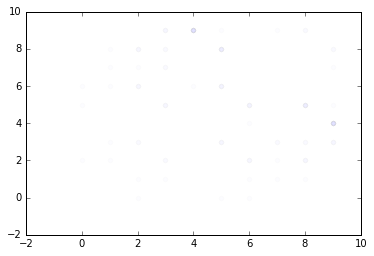

In [25]:
guesses = np.array([])
confusion = np.empty((0,2))
not_found = np.array([])

for ntest in range(500):
    digit_to_guess = np.random.randint(0,10)
    img = getRandomDigitFrom(digit_to_guess)
    #plt.axis('off')
    #plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.show()
    img = img.reshape(1,-1)
    guessed = 0
    wrong_digit = -1
    print('This is a ', digit_to_guess)
    test = classifier.predict(img)

    print('guessed : ', test)
    if test == digit_to_guess:
        guessed = 1
    else:
        wrong_digit = test
    
    guesses = np.append(guesses, guessed)
    if(guessed == 0):
        if wrong_digit >= 0:
            conf = np.sort(np.array([digit_to_guess, wrong_digit]))
            confusion = np.vstack((confusion, conf))
        else:
            not_found = np.append(not_found,digit_to_guess)
        
       
    
w,d = np.unique(guesses, return_inverse=True)
print('confusion: ', confusion)
#print('d', d)
print('total : ', np.bincount(d))
print(np.bincount(d))
if np.bincount(d).size == 1:
    print('perf = 100%')
else:
    print('perf = {}%'.format(np.bincount(d)[1] / (np.bincount(d)[0] + np.bincount(d)[1]) *100))

# Stats on most not found digits:
not_found_qty = np.bincount(list(not_found))
#print('not found qty',not_found_qty)

if not_found_qty.size > 0:
    fig, ax = plt.subplots()
    plt.bar(range(10), not_found_qty, align='center')
    plt.xlim(-1,10)
    ax.set_xticks(range(10))
    plt.show()

not_found_idx = np.ma.argsort(not_found_qty)[::-1]
#print('not found index',not_found_idx)
for i in range(not_found_idx.size):
    print('{} has been missed {} times'.format(not_found_idx[i], not_found_qty[not_found_idx[i]]))


#Stats on confusion:
print('Confusion :')
plt.scatter(confusion[:,0], confusion[:,1], alpha=0.01)
plt.scatter(confusion[:,1], confusion[:,0], alpha=0.01)
plt.show()

